# Group 31: Xinyu Xiong, Yueling Feng, Yuxin Yang, Yixuan Deng

## Weekly cases and deaths per 100,000 population
### Cases and deaths data is from (https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf)
### Population data is from (https://www.census.gov/quickfacts/fact/table/US/PST045219)

In [107]:
from dask import dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Read Data
df = dd.read_csv("C:/Users/yang/Desktop/ucdavis/study/Spring 2021/STA 160/COVID 19 DATASET/COVID19Data.csv")
df = df.drop(["cdc_report_dt", "pos_spec_dt", "onset_dt", "hosp_yn", "icu_yn", "medcond_yn"], axis="columns")
df = df.compute()
df.shape

(25607582, 6)

In [3]:
# Set clinical date as our timeline
df["cdc_case_earliest_dt "] = pd.to_datetime(df["cdc_case_earliest_dt "])

In [4]:
df.head(10)

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,death_yn
0,2021-04-10,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing
1,2020-10-13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No
2,2020-11-27,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing
3,2020-10-08,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",No
4,2021-01-11,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing
5,2020-06-06,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No
6,2020-07-14,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing
7,2021-01-26,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing
8,2020-08-27,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No
9,2020-11-10,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",No


In [51]:
# Separate laboratory-confirmed cases for five ethnic groups
black = df[df.race_ethnicity_combined == "Black, Non-Hispanic"]
black = black[black.current_status == "Laboratory-confirmed case"]
black.shape

(1645539, 6)

In [53]:
AIAN = df[df.race_ethnicity_combined == "American Indian/Alaska Native, Non-Hispanic"]
AIAN = AIAN[AIAN.current_status == "Laboratory-confirmed case"]
AIAN.shape

(145562, 6)

In [54]:
asian = df[df.race_ethnicity_combined == "Asian, Non-Hispanic"]
asian = asian[asian.current_status == "Laboratory-confirmed case"]
asian.shape

(488430, 6)

In [55]:
white = df[df.race_ethnicity_combined == "White, Non-Hispanic"]
white = white[white.current_status == "Laboratory-confirmed case"]
white.shape

(6948319, 6)

In [56]:
hispanic = df[df.race_ethnicity_combined == "Hispanic/Latino"]
hispanic = hispanic[hispanic.current_status == "Laboratory-confirmed case"]
hispanic.shape

(4494749, 6)

In [100]:
# Calculate average cases for each ethnic groups per ethnic population
black_date = pd.Series(black["cdc_case_earliest_dt "]).dt.to_period('W').value_counts().sort_index()
black_date = pd.DataFrame(black_date)
Countbyrace = black_date.rename(columns = {"cdc_case_earliest_dt ": "Black, Non-Hispanic"})
Countbyrace["Black, Non-Hispanic"] = Countbyrace["Black, Non-Hispanic"] * 0.00227
Countbyrace

,"Black, Non-Hispanic"
2019-12-30/2020-01-05,0.49259
2020-01-06/2020-01-12,0.13393
2020-01-13/2020-01-19,0.13847
2020-01-20/2020-01-26,0.14301
2020-01-27/2020-02-02,0.22473
...,...
2021-04-05/2021-04-11,62.23432
2021-04-12/2021-04-18,63.47601
2021-04-19/2021-04-25,68.63799
2021-04-26/2021-05-02,58.33673


In [101]:
AIAN_date = pd.Series(AIAN["cdc_case_earliest_dt "]).dt.to_period('W').value_counts().sort_index()
AIAN_date = pd.DataFrame(AIAN_date)
AIAN_date = AIAN_date.rename(columns = {"cdc_case_earliest_dt ": "American Indian/Alaska Native, Non-Hispanic"})
date = AIAN_date["American Indian/Alaska Native, Non-Hispanic"]
Countbyrace = Countbyrace.join(date)
Countbyrace["American Indian/Alaska Native, Non-Hispanic"] = Countbyrace["American Indian/Alaska Native, Non-Hispanic"] * 0.02344
Countbyrace

,"Black, Non-Hispanic","American Indian/Alaska Native, Non-Hispanic"
2019-12-30/2020-01-05,0.49259,0.11720
2020-01-06/2020-01-12,0.13393,0.07032
2020-01-13/2020-01-19,0.13847,0.21096
2020-01-20/2020-01-26,0.14301,0.32816
2020-01-27/2020-02-02,0.22473,0.04688
...,...,...
2021-04-05/2021-04-11,62.23432,26.18248
2021-04-12/2021-04-18,63.47601,25.66680
2021-04-19/2021-04-25,68.63799,66.19456
2021-04-26/2021-05-02,58.33673,52.64624


In [102]:
asian_date = pd.Series(asian["cdc_case_earliest_dt "]).dt.to_period('W').value_counts().sort_index()
asian_date = pd.DataFrame(asian_date)
asian_date = asian_date.rename(columns = {"cdc_case_earliest_dt ": "Asian, Non-Hispanic"})
date = asian_date["Asian, Non-Hispanic"]
Countbyrace = Countbyrace.join(date)
Countbyrace["Asian, Non-Hispanic"] = Countbyrace["Asian, Non-Hispanic"] * 0.00516
Countbyrace

,"Black, Non-Hispanic","American Indian/Alaska Native, Non-Hispanic","Asian, Non-Hispanic"
2019-12-30/2020-01-05,0.49259,0.11720,0.10320
2020-01-06/2020-01-12,0.13393,0.07032,0.05160
2020-01-13/2020-01-19,0.13847,0.21096,0.05676
2020-01-20/2020-01-26,0.14301,0.32816,0.13416
2020-01-27/2020-02-02,0.22473,0.04688,0.11352
...,...,...,...
2021-04-05/2021-04-11,62.23432,26.18248,37.27584
2021-04-12/2021-04-18,63.47601,25.66680,32.34288
2021-04-19/2021-04-25,68.63799,66.19456,32.53896
2021-04-26/2021-05-02,58.33673,52.64624,22.97748


In [103]:
white_date = pd.Series(white["cdc_case_earliest_dt "]).dt.to_period('W').value_counts().sort_index()
white_date = pd.DataFrame(white_date)
white_date = white_date.rename(columns = {"cdc_case_earliest_dt ": "White, Non-Hispanic"})
date = white_date["White, Non-Hispanic"]
Countbyrace = Countbyrace.join(date)
Countbyrace["White, Non-Hispanic"] = Countbyrace["White, Non-Hispanic"] * 0.0005069
Countbyrace

,"Black, Non-Hispanic","American Indian/Alaska Native, Non-Hispanic","Asian, Non-Hispanic","White, Non-Hispanic"
2019-12-30/2020-01-05,0.49259,0.11720,0.10320,0.284878
2020-01-06/2020-01-12,0.13393,0.07032,0.05160,0.118108
2020-01-13/2020-01-19,0.13847,0.21096,0.05676,0.125711
2020-01-20/2020-01-26,0.14301,0.32816,0.13416,0.151056
2020-01-27/2020-02-02,0.22473,0.04688,0.11352,0.171839
...,...,...,...,...
2021-04-05/2021-04-11,62.23432,26.18248,37.27584,49.498785
2021-04-12/2021-04-18,63.47601,25.66680,32.34288,46.191769
2021-04-19/2021-04-25,68.63799,66.19456,32.53896,53.238186
2021-04-26/2021-05-02,58.33673,52.64624,22.97748,38.396661


In [104]:
hispanic_date = pd.Series(hispanic["cdc_case_earliest_dt "]).dt.to_period('W').value_counts().sort_index()
hispanic_date = pd.DataFrame(hispanic_date)
hispanic_date = hispanic_date.rename(columns = {"cdc_case_earliest_dt ": "Hispanic/Latino"})
date = hispanic_date["Hispanic/Latino"]
Countbyrace = Countbyrace.join(date)
Countbyrace["Hispanic/Latino"] = Countbyrace["Hispanic/Latino"] * 0.00165
Countbyrace

,"Black, Non-Hispanic","American Indian/Alaska Native, Non-Hispanic","Asian, Non-Hispanic","White, Non-Hispanic",Hispanic/Latino
2019-12-30/2020-01-05,0.49259,0.11720,0.10320,0.284878,0.32340
2020-01-06/2020-01-12,0.13393,0.07032,0.05160,0.118108,0.19305
2020-01-13/2020-01-19,0.13847,0.21096,0.05676,0.125711,0.16500
2020-01-20/2020-01-26,0.14301,0.32816,0.13416,0.151056,0.16335
2020-01-27/2020-02-02,0.22473,0.04688,0.11352,0.171839,0.22935
...,...,...,...,...,...
2021-04-05/2021-04-11,62.23432,26.18248,37.27584,49.498785,74.60640
2021-04-12/2021-04-18,63.47601,25.66680,32.34288,46.191769,69.73065
2021-04-19/2021-04-25,68.63799,66.19456,32.53896,53.238186,83.37780
2021-04-26/2021-05-02,58.33673,52.64624,22.97748,38.396661,60.08970


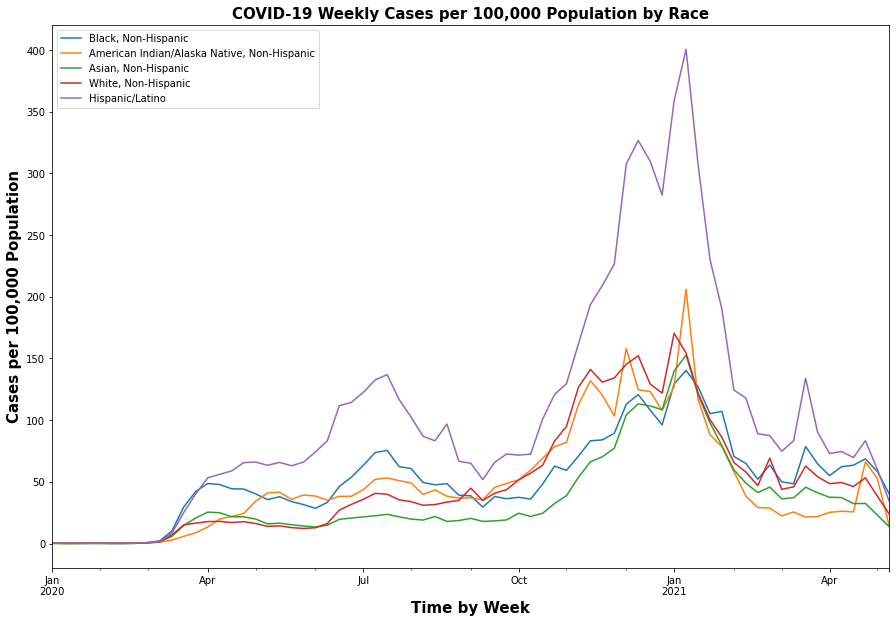

In [120]:
# Plot cases across ethnic groups
Countbyrace.plot()
plt.legend()
plt.title("COVID-19 Weekly Cases per 100,000 Population by Race", fontweight ='bold', fontsize = 15)
plt.xlabel("Time by Week", fontweight ='bold', fontsize = 15)
plt.ylabel("Cases per 100,000 Population", fontweight ='bold', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(15, 10)

In [63]:
# Separate deaths for five ethnic groups
black_death = black[black.death_yn == "Yes"]
black_death.shape

(49735, 6)

In [65]:
AIAN_death = AIAN[AIAN.death_yn == "Yes"]
AIAN_death.shape

(3133, 6)

In [66]:
asian_death = asian[asian.death_yn == "Yes"]
asian_death.shape

(14904, 6)

In [67]:
white_death = white[white.death_yn == "Yes"]
white_death.shape

(206036, 6)

In [68]:
hispanic_death = hispanic[hispanic.death_yn == "Yes"]
hispanic_death.shape

(69987, 6)

In [114]:
# Calculate average deaths for each ethnic groups per ethnic population
black_ddate = pd.Series(black_death["cdc_case_earliest_dt "]).dt.to_period('W').value_counts().sort_index()
black_ddate = pd.DataFrame(black_ddate)
Countbyraced = black_ddate.rename(columns = {"cdc_case_earliest_dt ": "Black, Non-Hispanic"})
Countbyraced["Black, Non-Hispanic"] = Countbyraced["Black, Non-Hispanic"] * 0.00227
Countbyraced

,"Black, Non-Hispanic"
2019-12-30/2020-01-05,0.30872
2020-01-06/2020-01-12,0.02043
2020-01-13/2020-01-19,0.02270
2020-01-20/2020-01-26,0.02497
2020-01-27/2020-02-02,0.03859
...,...
2021-04-05/2021-04-11,0.70143
2021-04-12/2021-04-18,0.48124
2021-04-19/2021-04-25,0.47670
2021-04-26/2021-05-02,0.32234


In [115]:
AIAN_ddate = pd.Series(AIAN_death["cdc_case_earliest_dt "]).dt.to_period('W').value_counts().sort_index()
AIAN_ddate = pd.DataFrame(AIAN_ddate)
AIAN_ddate = AIAN_ddate.rename(columns = {"cdc_case_earliest_dt ": "American Indian/Alaska Native, Non-Hispanic"})
ddate = AIAN_ddate["American Indian/Alaska Native, Non-Hispanic"]
Countbyraced = Countbyraced.join(ddate)
Countbyraced["American Indian/Alaska Native, Non-Hispanic"] = Countbyraced["American Indian/Alaska Native, Non-Hispanic"] * 0.02344
Countbyraced

,"Black, Non-Hispanic","American Indian/Alaska Native, Non-Hispanic"
2019-12-30/2020-01-05,0.30872,0.04688
2020-01-06/2020-01-12,0.02043,NaN
2020-01-13/2020-01-19,0.02270,NaN
2020-01-20/2020-01-26,0.02497,NaN
2020-01-27/2020-02-02,0.03859,NaN
...,...,...
2021-04-05/2021-04-11,0.70143,0.14064
2021-04-12/2021-04-18,0.48124,0.18752
2021-04-19/2021-04-25,0.47670,0.18752
2021-04-26/2021-05-02,0.32234,0.18752


In [116]:
asian_ddate = pd.Series(asian_death["cdc_case_earliest_dt "]).dt.to_period('W').value_counts().sort_index()
asian_ddate = pd.DataFrame(asian_ddate)
asian_ddate = asian_ddate.rename(columns = {"cdc_case_earliest_dt ": "Asian, Non-Hispanic"})
ddate = asian_ddate["Asian, Non-Hispanic"]
Countbyraced = Countbyraced.join(ddate)
Countbyraced["Asian, Non-Hispanic"] = Countbyraced["Asian, Non-Hispanic"] * 0.00516
Countbyraced

,"Black, Non-Hispanic","American Indian/Alaska Native, Non-Hispanic","Asian, Non-Hispanic"
2019-12-30/2020-01-05,0.30872,0.04688,0.04128
2020-01-06/2020-01-12,0.02043,NaN,NaN
2020-01-13/2020-01-19,0.02270,NaN,0.00516
2020-01-20/2020-01-26,0.02497,NaN,0.02580
2020-01-27/2020-02-02,0.03859,NaN,0.01032
...,...,...,...
2021-04-05/2021-04-11,0.70143,0.14064,0.30444
2021-04-12/2021-04-18,0.48124,0.18752,0.21672
2021-04-19/2021-04-25,0.47670,0.18752,0.15996
2021-04-26/2021-05-02,0.32234,0.18752,0.13416


In [117]:
white_ddate = pd.Series(white_death["cdc_case_earliest_dt "]).dt.to_period('W').value_counts().sort_index()
white_ddate = pd.DataFrame(white_ddate)
white_ddate = white_ddate.rename(columns = {"cdc_case_earliest_dt ": "White, Non-Hispanic"})
ddate = white_ddate["White, Non-Hispanic"]
Countbyraced = Countbyraced.join(ddate)
Countbyraced["White, Non-Hispanic"] = Countbyraced["White, Non-Hispanic"] * 0.0005069
Countbyraced

,"Black, Non-Hispanic","American Indian/Alaska Native, Non-Hispanic","Asian, Non-Hispanic","White, Non-Hispanic"
2019-12-30/2020-01-05,0.30872,0.04688,0.04128,0.108477
2020-01-06/2020-01-12,0.02043,NaN,NaN,0.009631
2020-01-13/2020-01-19,0.02270,NaN,0.00516,0.019262
2020-01-20/2020-01-26,0.02497,NaN,0.02580,0.026866
2020-01-27/2020-02-02,0.03859,NaN,0.01032,0.024331
...,...,...,...,...
2021-04-05/2021-04-11,0.70143,0.14064,0.30444,0.483583
2021-04-12/2021-04-18,0.48124,0.18752,0.21672,0.447593
2021-04-19/2021-04-25,0.47670,0.18752,0.15996,0.360406
2021-04-26/2021-05-02,0.32234,0.18752,0.13416,0.242805


In [119]:
hispanic_ddate = pd.Series(hispanic_death["cdc_case_earliest_dt "]).dt.to_period('W').value_counts().sort_index()
hispanic_ddate = pd.DataFrame(hispanic_ddate)
hispanic_ddate = hispanic_ddate.rename(columns = {"cdc_case_earliest_dt ": "Hispanic/Latino"})
ddate = hispanic_ddate["Hispanic/Latino"]
Countbyraced = Countbyraced.join(ddate)
Countbyraced["Hispanic/Latino"] = Countbyraced["Hispanic/Latino"] * 0.00165
Countbyraced

,"Black, Non-Hispanic","American Indian/Alaska Native, Non-Hispanic","Asian, Non-Hispanic","White, Non-Hispanic",Hispanic/Latino
2019-12-30/2020-01-05,0.30872,0.04688,0.04128,0.108477,0.08745
2020-01-06/2020-01-12,0.02043,NaN,NaN,0.009631,0.02145
2020-01-13/2020-01-19,0.02270,NaN,0.00516,0.019262,0.00825
2020-01-20/2020-01-26,0.02497,NaN,0.02580,0.026866,0.01320
2020-01-27/2020-02-02,0.03859,NaN,0.01032,0.024331,0.02475
...,...,...,...,...,...
2021-04-05/2021-04-11,0.70143,0.14064,0.30444,0.483583,0.39105
2021-04-12/2021-04-18,0.48124,0.18752,0.21672,0.447593,0.29040
2021-04-19/2021-04-25,0.47670,0.18752,0.15996,0.360406,0.19635
2021-04-26/2021-05-02,0.32234,0.18752,0.13416,0.242805,0.11880


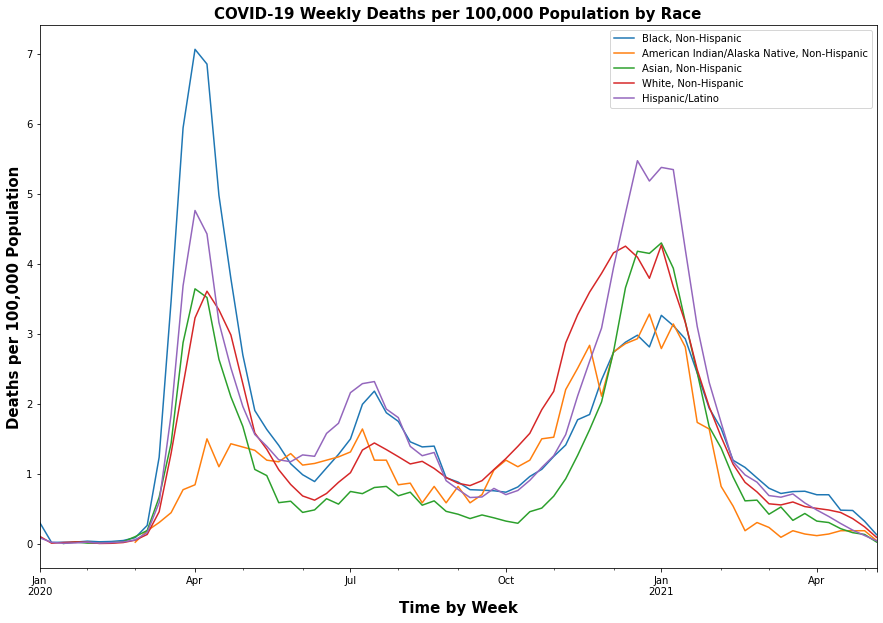

In [121]:
# Plot deaths across ethnic groups
Countbyraced.plot()
plt.legend()
plt.title("COVID-19 Weekly Deaths per 100,000 Population by Race", fontweight ='bold', fontsize = 15)
plt.xlabel("Time by Week", fontweight ='bold', fontsize = 15)
plt.ylabel("Deaths per 100,000 Population", fontweight ='bold', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(15, 10)